# Importing the packages and dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dib = pd.read_csv("C://Users/Vishnu/Desktop/Classification Test/diabetes.csv")

In [3]:
dib.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Performing Basic Exploratory Data Analysis

###  Finding if any null values exist or not. 

In [4]:
dib.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Finding the correlation 

In [5]:
dib.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


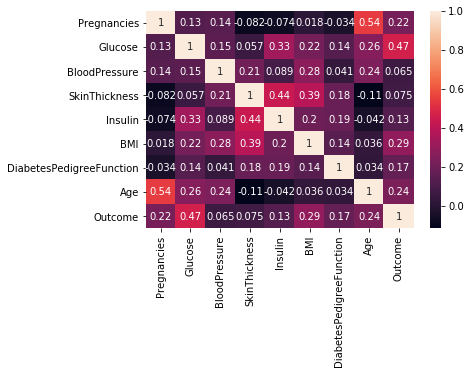

In [8]:
sns.heatmap(dib.corr(),annot = True)

# Data Visualization 

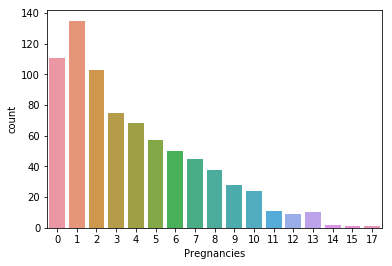

In [9]:
sns.countplot(dib.Pregnancies)

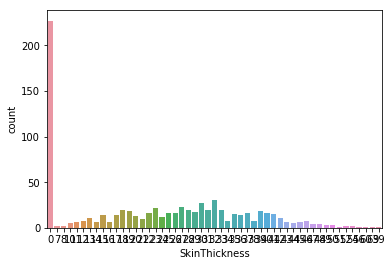

In [58]:
sns.countplot(dib.SkinThickness)

### To find Outliers by Boxplot 

{'whiskers': [<matplotlib.lines.Line2D at 0x8dd98f03c8>,
 'caps': [<matplotlib.lines.Line2D at 0x8dd98f0a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x8dd98f9f98>],
 'medians': [<matplotlib.lines.Line2D at 0x8dd98f0e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x8dd9904470>],
 'means': []}

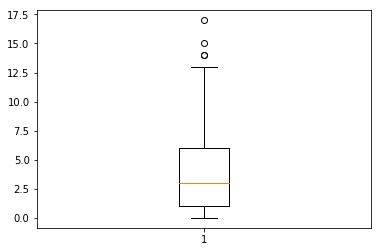

In [14]:
plt.boxplot(dib.Pregnancies)

### FInding relationship between Glucose and Outcome using Scatterplot 

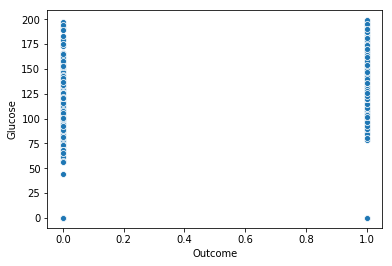

In [15]:
sns.scatterplot(x=dib.Outcome,y=dib.Glucose)

### Distribution of BMI and Insulin.

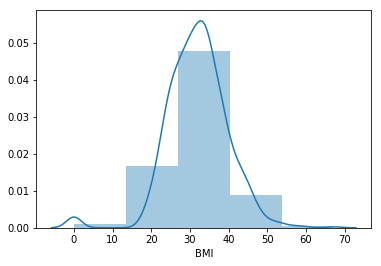

In [17]:
sns.distplot(dib.BMI,bins = 5)

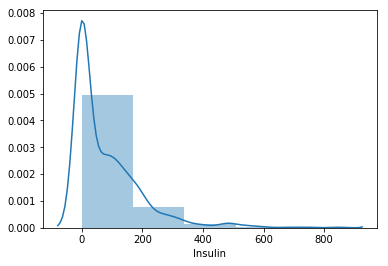

In [21]:
sns.distplot(dib.Insulin,bins = 5)

# Importing Packages for Standard Scaling,Decision Tree and Metrics

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,cohen_kappa_score,mean_squared_error

In [24]:
from sklearn.tree import DecisionTreeClassifier

### Scaling The Data 

In [25]:
sc = StandardScaler()

In [27]:
sc_dib=pd.DataFrame(sc.fit_transform(dib.drop("Outcome",axis=1)),columns=dib.columns[0:8])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
sc_dib

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


# Spliting the Data into train and test sets to prepare the data for Classification. 

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
x = sc_dib
y = dib.Outcome

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=123)

### Fitting the data using Decision Tree Classifier,taking the criterion as 'gini' and depth as 5.

In [53]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=5)

In [54]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Prediciting the data. 

In [55]:
dibp=dt.predict(xtest)

### Finding the accuracy 

In [56]:
accuracy_score(ytest,dibp)

0.7359307359307359

### Finding the cohen kappa score 

In [57]:
cohen_kappa_score(ytest,dibp)

0.44134321849105973

### Fitting the data using Decision Tree Classifier,taking the criterion as 'entropy' and depth as 5. 

In [59]:
dt1=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [60]:
dt1.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
dibp1=dt1.predict(xtest)

### Finding the accuracy 

In [63]:
accuracy_score(ytest,dibp1)

0.7619047619047619

### Finding the cohen_kappa_score

In [64]:
cohen_kappa_score(ytest,dibp1)

0.4873501997336884

# Evaluation:
Accuracy score is coming higher for "ENTROPY" than "GINI".
While the cohen_kappa score is also coming higher for "ENTROPY" than "GINI".
